## Installing Packages

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer

## Reading Dataset

In [20]:
df = pd.read_csv("data/realtor-data.csv")

In [21]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [22]:
df.tail()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
904961,for_sale,2.0,2.0,NaN,New York City,New York,10463.0,NaN,2021-08-13,359000.0
904962,for_sale,2.0,2.0,NaN,Bronx,New York,10463.0,1200.0,NaN,299000.0
904963,for_sale,NaN,1.0,NaN,Bronx,New York,10463.0,NaN,NaN,120000.0
904964,for_sale,3.0,2.0,NaN,Bronx,New York,10463.0,NaN,NaN,449000.0
904965,for_sale,3.0,3.0,NaN,New York City,New York,10463.0,1677.0,2007-06-27,850000.0


## Preliminary Analysis

In [23]:
df.shape

(904966, 10)

In [24]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,775126.000000,791082.000000,638324.000000,904762.000000,6.120800e+05,9.048950e+05
mean,3.332190,2.484236,17.317292,6519.464582,2.138437e+03,8.774382e+05
std,2.065312,1.931622,970.707378,3816.713093,3.046600e+03,2.457698e+06
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,0.000000e+00
25%,2.000000,2.000000,0.110000,2908.000000,1.132000e+03,2.685000e+05
50%,3.000000,2.000000,0.290000,6811.000000,1.650000e+03,4.750000e+05
75%,4.000000,3.000000,1.150000,8854.000000,2.495000e+03,8.300000e+05
max,123.000000,198.000000,100000.000000,99999.000000,1.450112e+06,8.750000e+08


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904966 entries, 0 to 904965
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          904966 non-null  object 
 1   bed             775126 non-null  float64
 2   bath            791082 non-null  float64
 3   acre_lot        638324 non-null  float64
 4   city            904894 non-null  object 
 5   state           904966 non-null  object 
 6   zip_code        904762 non-null  float64
 7   house_size      612080 non-null  float64
 8   prev_sold_date  445865 non-null  object 
 9   price           904895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 69.0+ MB


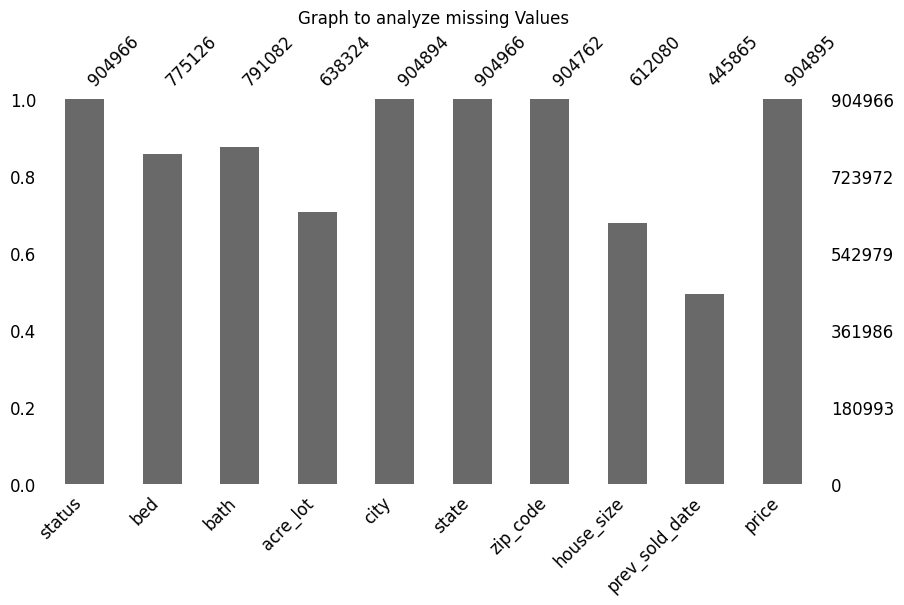

In [26]:
msno.bar(df,figsize=(10,5), fontsize=12)
plt.title("Graph to analyze missing Values")
plt.show()

Now, it wouldn't make sense to study the housing prices in various cities if the city name has not been included

In [27]:
df_updated = df.dropna(subset = "city")

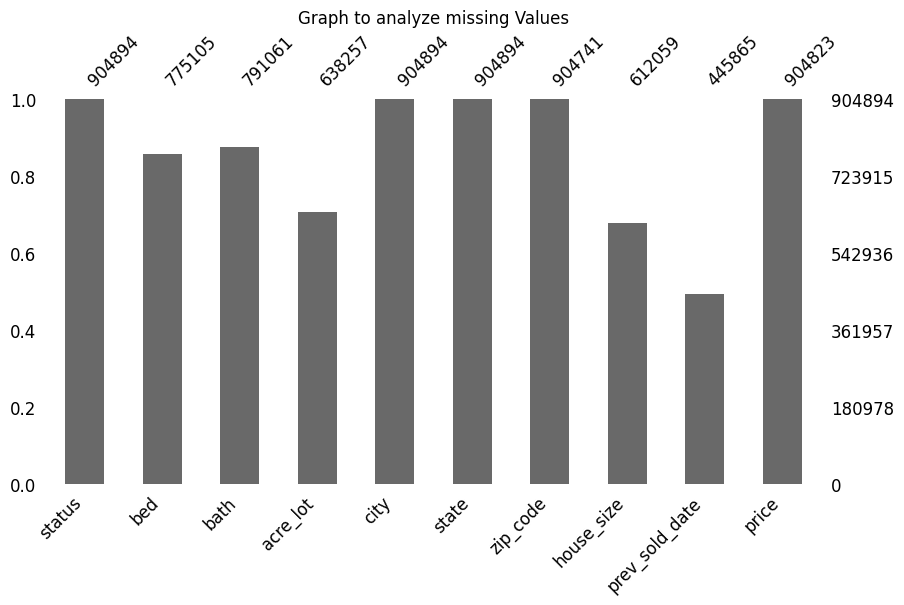

In [28]:
msno.bar(df_updated,figsize=(10,5), fontsize=12)
plt.title("Graph to analyze missing Values")
plt.show()

Again, we need the price for the house in order to analyze the pricing trends

In [29]:
df_updated = df_updated.dropna(subset="price")

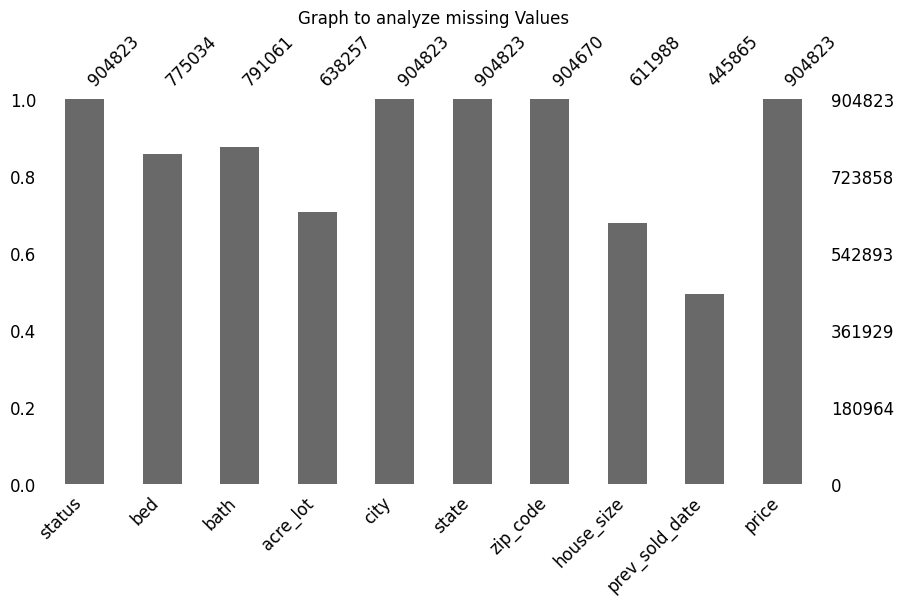

In [30]:
msno.bar(df_updated,figsize=(10,5), fontsize=12)
plt.title("Graph to analyze missing Values")
plt.show()

### Cleaning the Data

In [59]:
df_cleaning = df.copy()

In [60]:
df_cleaning = df_cleaning.drop(["zip_code","status"],axis = 1)

In [61]:
df_cleaning['new_house'] = df['prev_sold_date'].isnull().astype(int)

<Axes: >

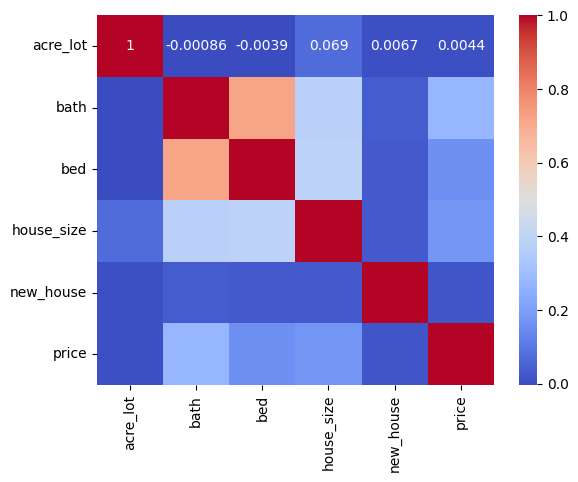

In [63]:
columns_to_exclude = ['city','state','prev_sold_date']
corr_mx = df_cleaning[df_cleaning.columns.difference(columns_to_exclude)].corr()
sns.heatmap(corr_mx, annot = True, cmap = 'coolwarm')

In [34]:
bed_imputer = SimpleImputer(strategy='median')
bath_imputer = SimpleImputer(strategy='median')

bed_imputer.fit(df_cleaning[['bed']])
bath_imputer.fit(df_cleaning[['bath']])

df_cleaning['bed'] = bed_imputer.transform(df_cleaning[['bed']])
df_cleaning['bath'] = bath_imputer.transform(df_cleaning[['bath']])

In [35]:
df_cleaning.isnull().sum()

status                 0
bed                    0
bath                   0
acre_lot          266642
city                  72
state                  0
zip_code             204
house_size        292886
prev_sold_date    459101
price                 71
new_house              0
dtype: int64

In [36]:
df.isnull().sum()

status                 0
bed               129840
bath              113884
acre_lot          266642
city                  72
state                  0
zip_code             204
house_size        292886
prev_sold_date    459101
price                 71
dtype: int64